In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import mode

In [2]:
dataset=pd.read_csv('iphone_purchase_records.csv')

In [3]:
dataset.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
dataset = dataset.drop('Gender',axis=1)

In [5]:
dataset.head()

,Age,Salary,Purchase Iphone
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
X = dataset.drop('Purchase Iphone',axis=1)
Y = dataset['Purchase Iphone']

In [7]:
print(X)
print(Y)

     Age  Salary
0     19   19000
1     35   20000
2     26   43000
3     27   57000
4     19   76000
..   ...     ...
395   46   41000
396   51   23000
397   50   20000
398   36   33000
399   49   36000

[400 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64


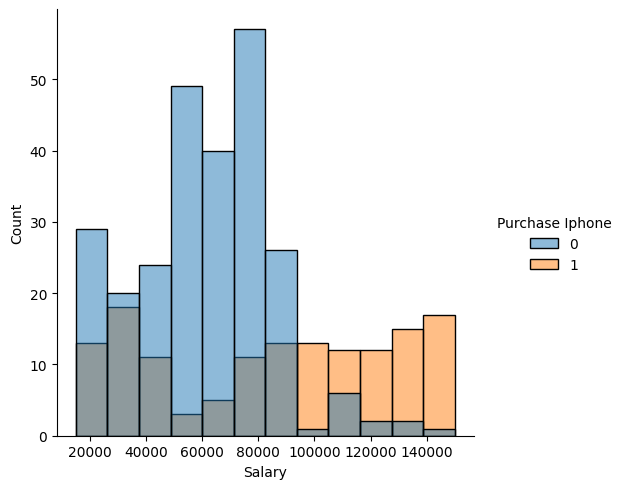

In [8]:
sns.displot(dataset,x='Salary',hue='Purchase Iphone')

In [9]:
def euclidean_distance(pt1,pt2):
    distance=np.sqrt(np.sum((pt1-pt2)**2))
    return distance

In [10]:
def KNN(X_train,X_test,Y_train,Y_test,k_val):
    y_hat=[]
    for test_pt in X_test.to_numpy():
        
        distances=[]
        for i in range(len(X_train)):
            distances.append(euclidean_distance(np.array(X_train.iloc[i]),test_pt))
        
        distance_data=pd.DataFrame(data=distances,columns=['distance'],index=Y_train.index)
        
        k_neighbours_list=distance_data.sort_values(by=['distance'],axis=0)[:k_val]
        
        labels=Y_train.loc[k_neighbours_list.index]
        
        voting=mode(labels,keepdims=True).mode[0]
        
        y_hat.append(voting)
    
    return y_hat

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,random_state=42)
y_hat_test=KNN(X_train,X_test,Y_train,Y_test,k_val=5)

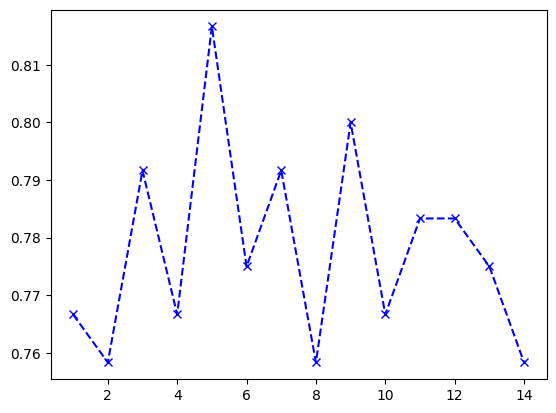

In [12]:
accuracy_vals=[]
for i in range(1,15):
    y_hat_test=KNN(X_train,X_test,Y_train,Y_test,k_val=i)
    accuracy_vals.append(accuracy_score(Y_test,y_hat_test))
plt.plot(range(1,15),accuracy_vals,color='blue',marker='x',linestyle='dashed')

0.8166666666666667


Text(0.5, 1.0, 'KNN Results')

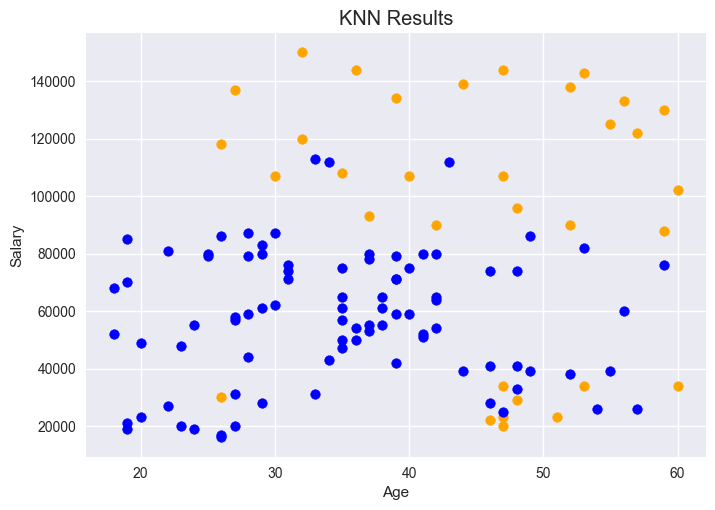

In [17]:
y_hat_test = KNN(X_train,X_test,Y_train,Y_test,k_val=5)
print(accuracy_score(Y_test,y_hat_test))
for i in range(len(y_hat_test)):
    if(y_hat_test[i]==0):
        plt.scatter(X_test.iloc[i]['Age'],X_test.iloc[i]['Salary'],color='blue')
    if(y_hat_test[i]==1):
        plt.scatter(X_test.iloc[i]['Age'],X_test.iloc[i]['Salary'],color='orange')

plt.style.use('ggplot')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('KNN Results')

<AxesSubplot: xlabel='Age', ylabel='Salary'>

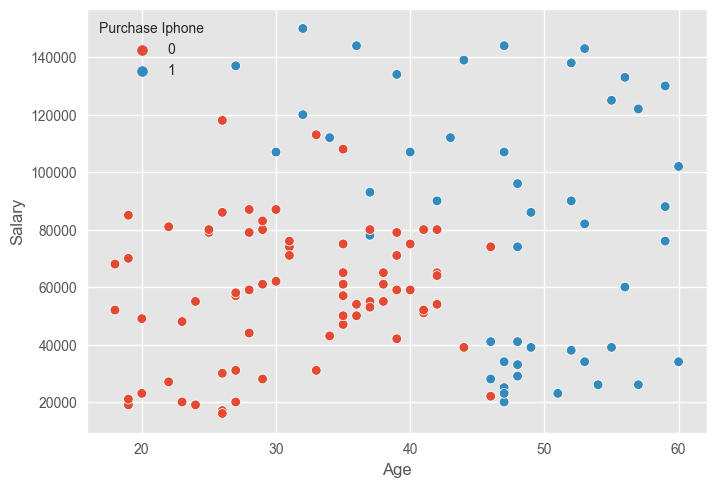

In [19]:
sns.scatterplot(data=dataset,x=X_test['Age'],y=X_test['Salary'],hue='Purchase Iphone')